# Overview
This notebook demonstrates how to load costs reduced diagnostics data and plot the corresponding distribution mappings and costs.

# Imports

In [1]:
# Math
import numpy as np
import random

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Data handling
import analysis as an

# Load data

In [2]:
sim_knapsack = an.SimData('./data/diags_knapsack/diags/', # Data directory
                          [2800]                          # Files to process
                         )
sim_sfc = an.SimData('./data/diags_sfc/diags/', [2800])

# Set reduced diagnostics data for step 2800
for sim in [sim_knapsack, sim_sfc]: sim(2800)

# Plotting (distribution mappings)

In [3]:
# Plotting -- we know beforehand the data is 2D
def plot(sim):
    # Make first cmap
    cmap = plt.cm.nipy_spectral
    cmaplist = [cmap(i) for i in range(cmap.N)][::-1]
    unique_ranks = np.unique(sim.rank_arr)
    sz = len(unique_ranks)
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'my_cmap', cmaplist, sz) # create the new map

    # Make cmap from 1 --> 96 then randomize
    cmaplist= [cmap(i) for i in range(sz)]
    random.Random(6).shuffle(cmaplist)
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'my_cmap', cmaplist, sz) # create the new map

    # Define the bins and normalize
    bounds = np.linspace(0, sz, sz + 1)
    norm = mpl.colors.BoundaryNorm(bounds, sz)

    mx, mz = sim.rank_arr.shape
    xcoord, zcoord = range(mx), range(mz)
    im = plt.pcolormesh(xcoord, zcoord, sim.rank_arr,
                        cmap=cmap, norm=norm)

    # Grid lines
    plt.ylabel('$i$')
    plt.xlabel('$k$')
    plt.minorticks_on()
    plt.vlines(zcoord, xcoord[0], xcoord[-1], 
               alpha=0.7, linewidth=0.3, color='lightgrey')
    plt.hlines(xcoord, zcoord[0], zcoord[-1], 
               alpha=0.7, linewidth=0.3, color='lightgrey')

    plt.gca().set_aspect('equal')

    # Center rank label
    for i in zcoord:
        for j in xcoord:
            text = plt.gca().text(i+0.5, j+0.5, int(sim.rank_arr[j][i]),
                                  ha="center", va="center", 
                                  color="w", fontsize=8)

    # Colorbar
    divider = make_axes_locatable(plt.gca())
    cax = divider.new_horizontal(size="5%", pad=0.05)
    plt.gcf().add_axes(cax)
    cb=plt.gcf().colorbar(im, label='rank', cax=cax, orientation="vertical")
    minorticks = np.linspace(0, 1, len(unique_ranks) + 1)
    cb.ax.yaxis.set_ticks(minorticks, minor=True)

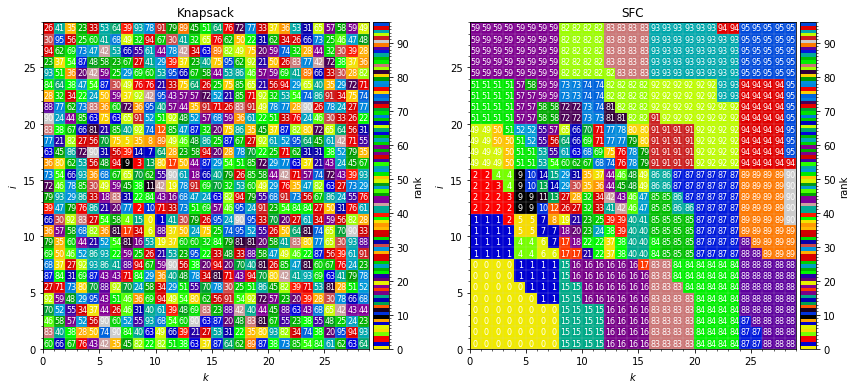

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.sca(axs[0])
plt.title('Knapsack')
plot(sim_knapsack)
plt.sca(axs[1])
plt.title('SFC')
plot(sim_sfc)
plt.tight_layout()

# Plotting (cost arrays)

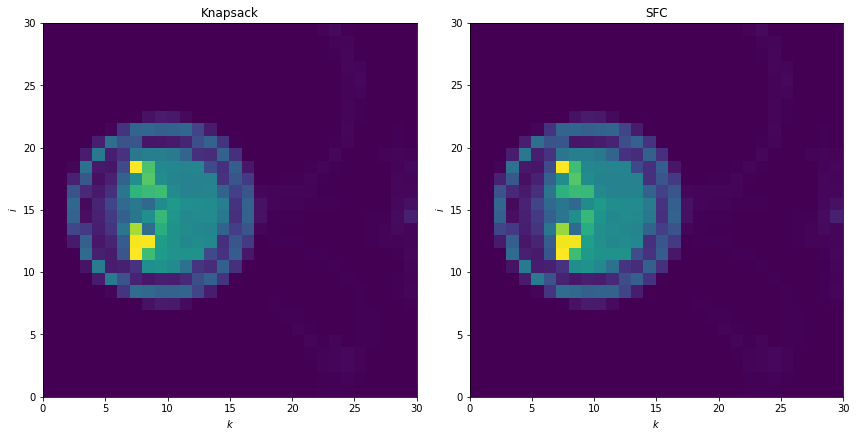

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.sca(axs[0])
plt.title('Knapsack')
plt.pcolormesh(sim_knapsack.cost_arr)
plt.sca(axs[1])
plt.title('SFC')
plt.pcolormesh(sim_sfc.cost_arr)

for ax in axs:
    plt.sca(ax)
    plt.ylabel('$i$')
    plt.xlabel('$k$')
    ax.set_aspect('equal')
    
plt.tight_layout()